# E-Commerce-Analysis-and-Prediction-Modelling :- EDA Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load feature data
df = pd.read_csv("data/processed/transactions_with_features.csv", parse_dates=["InvoiceDate"])


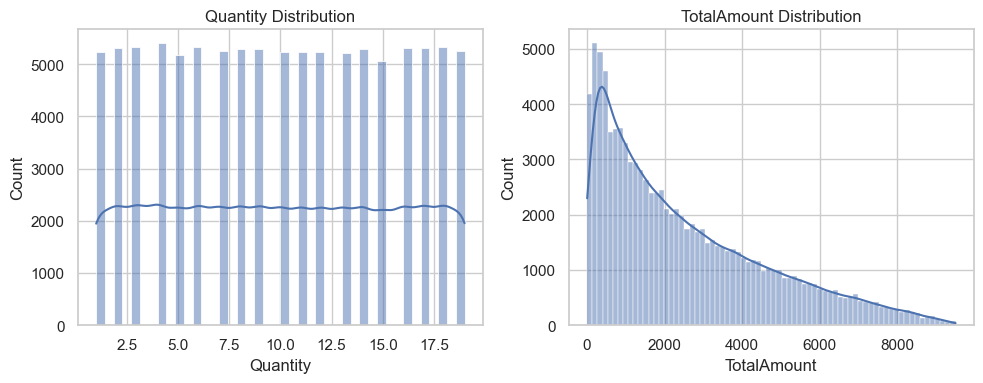

In [2]:
# Distribution of Quantity & TotalAmount
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Quantity"], kde=True)
plt.title("Quantity Distribution")

plt.subplot(1,2,2)
sns.histplot(df["TotalAmount"], kde=True)
plt.title("TotalAmount Distribution")
plt.tight_layout()
plt.show()

Top 10 Products by Revenue:
 ProductName
Salt         4287841.52
Honey        4269191.68
Toy          4257292.09
Magazine     4243391.09
Detergent    4225680.91
Jam          4225211.96
Pen          4224064.05
Yogurt       4222095.57
Rice         4216897.97
Biscuits     4213350.91
Name: TotalAmount, dtype: float64


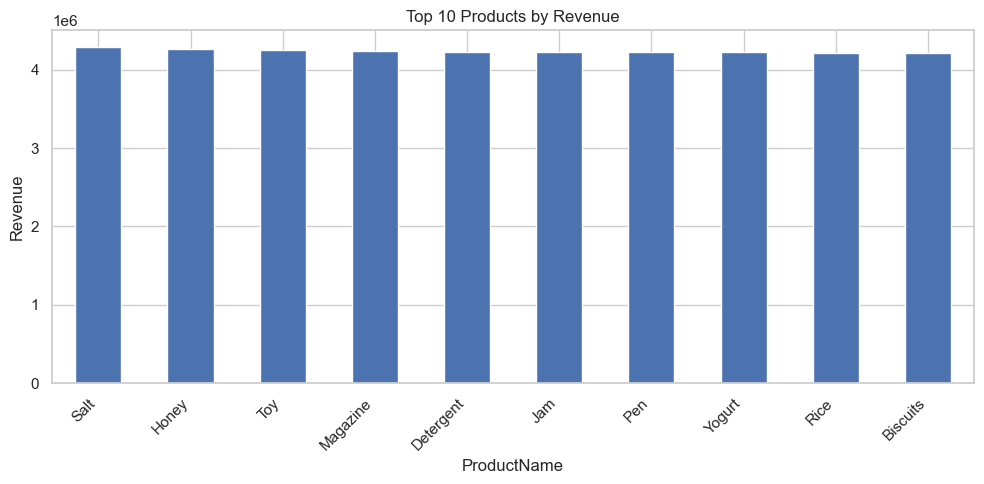

In [3]:
# Top 10 products by revenue
top_products = (
    df.groupby("ProductName")["TotalAmount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print("Top 10 Products by Revenue:\n", top_products)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Top 10 Countries by Revenue:
 Country
Korea                           2241110.58
Congo                           1947825.35
Brazil                          1215349.22
United States Virgin Islands    1208579.49
El Salvador                     1190919.01
Cayman Islands                  1182304.29
Chile                           1166637.65
Kazakhstan                      1159312.32
Austria                         1157134.85
Solomon Islands                 1146845.74
Name: TotalAmount, dtype: float64


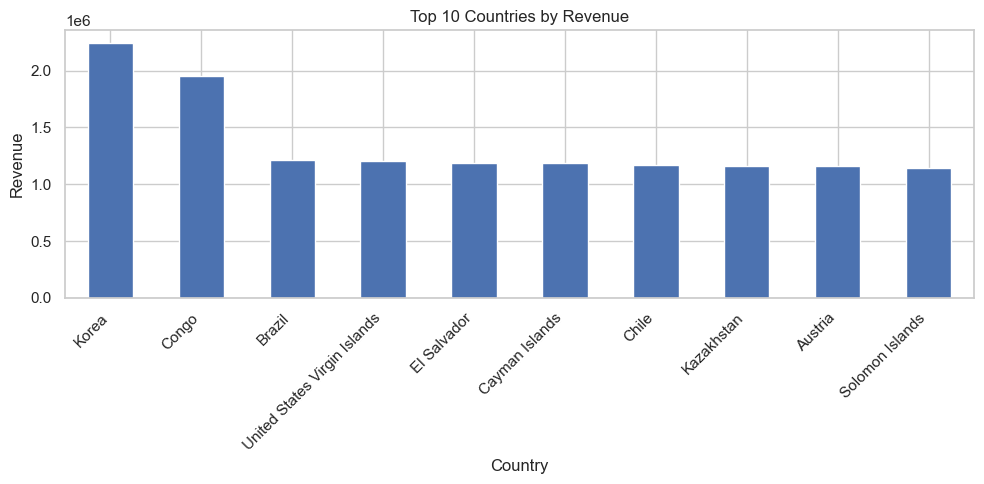

In [4]:
# Top 10 countries by revenue
top_countries = (
    df.groupby("Country")["TotalAmount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print("Top 10 Countries by Revenue:\n", top_countries)

plt.figure(figsize=(10,5))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

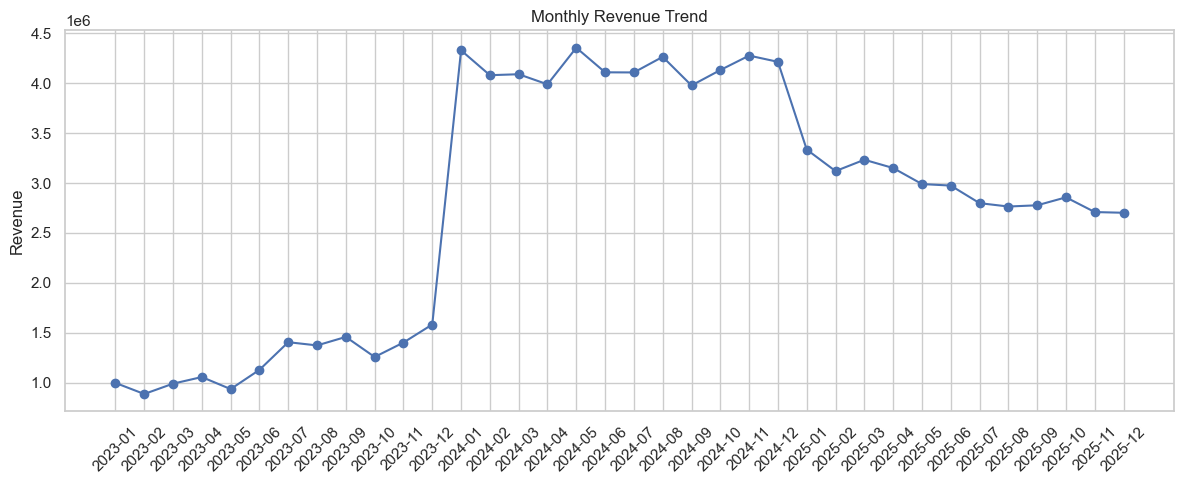

In [5]:
# Monthly revenue trend
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_revenue = (
    df.groupby("InvoiceMonth")["TotalAmount"]
      .sum()
      .reset_index()
)

monthly_revenue["InvoiceMonth"] = monthly_revenue["InvoiceMonth"].astype(str)

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue["InvoiceMonth"], monthly_revenue["TotalAmount"], marker="o")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

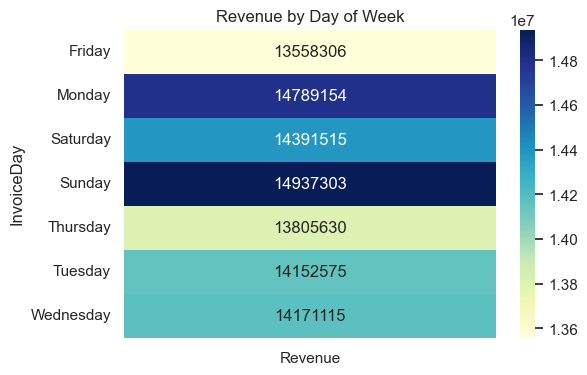

In [6]:
# Revenue by day of week heatmap
day_revenue = (
    df.groupby("InvoiceDay")["TotalAmount"]
      .sum()
      .to_frame("Revenue")
)

plt.figure(figsize=(6,4))
sns.heatmap(day_revenue, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue by Day of Week")
plt.show()